# Credit Card Application

## 1. Importing Libraries 

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import joblib
import itertools
import subprocess
from time import time
from scipy import stats
import scipy.optimize as opt  
from scipy.stats import chi2_contingency
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve


## 2. Importing and Descriptive Stats

In [58]:
# READ DATA
data = pd.read_excel("Approval.xlsx") 

data.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


In [59]:
# GETTING THE DIMENSIONS OF THE ARRAY
data.shape

(690, 16)

In [60]:
# VERIFYING IF WE IMPORTED THE RIGHT DATASET BY CHECKING THE FIRST 15 ENTRIES OF THE DATA
data.head(15)

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.250,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.040,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.500,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.750,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.710,1,0,0,0,ByOtherMeans,120,0,1
5,1,32.08,4.000,1,1,CommunicationServices,White,2.500,1,0,0,1,ByBirth,360,0,1
6,1,33.17,1.040,1,1,Transport,Black,6.500,1,0,0,1,ByBirth,164,31285,1
7,0,22.92,11.585,1,1,InformationTechnology,White,0.040,1,0,0,0,ByBirth,80,1349,1
8,1,54.42,0.500,0,0,Financials,Black,3.960,1,0,0,0,ByBirth,180,314,1
9,1,42.50,4.915,0,0,Industrials,White,3.165,1,0,0,1,ByBirth,52,1442,1


In [61]:
# VERIFYING IF WE IMPORTED THE RIGHT DATASET BY CHECKING THE LAST FIVE ENTRIES OF THE DATA
data.tail(5)

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
685,1,21.08,10.085,0,0,Education,Black,1.25,0,0,0,0,ByBirth,260,0,0
686,0,22.67,0.750,1,1,Energy,White,2.00,0,1,2,1,ByBirth,200,394,0
687,0,25.25,13.500,0,0,Healthcare,Latino,2.00,0,1,1,1,ByBirth,200,1,0
688,1,17.92,0.205,1,1,ConsumerStaples,White,0.04,0,0,0,0,ByBirth,280,750,0
689,1,35.00,3.375,1,1,Energy,Black,8.29,0,0,0,1,ByBirth,0,0,0


In [62]:
# DESCRIPTIVE STATS
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    int64  
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    int64  
 4   BankCustomer    690 non-null    int64  
 5   Industry        690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    int64  
 9   Employed        690 non-null    int64  
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    int64  
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    int64  
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    int64  
dtypes: float64(3), int64(10), object(3)
memory usage: 86.4+ KB


In [63]:
data.describe()

,Gender,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,ZipCode,Income,Approved
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000
mean,0.695652,31.514116,4.758725,0.760870,0.763768,2.223406,0.523188,0.427536,2.40000,0.457971,180.547826,1017.385507,0.444928
std,0.460464,11.860245,4.978163,0.426862,0.425074,3.346513,0.499824,0.495080,4.86294,0.498592,173.970323,5210.102598,0.497318
min,0.000000,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.670000,1.000000,1.000000,1.000000,0.165000,0.000000,0.000000,0.00000,0.000000,60.000000,0.000000,0.000000
50%,1.000000,28.460000,2.750000,1.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,160.000000,5.000000,0.000000
75%,1.000000,37.707500,7.207500,1.000000,1.000000,2.625000,1.000000,1.000000,3.00000,1.000000,272.000000,395.500000,1.000000
max,1.000000,80.250000,28.000000,1.000000,1.000000,28.500000,1.000000,1.000000,67.00000,1.000000,2000.000000,100000.000000,1.000000


## 3. Handling Missing Values

In [64]:
data.isnull().sum()

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
Industry          0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
Approved          0
dtype: int64

In [65]:
#IMPUTE MISSING VALUES

#for numeric data using mean
for val in data:
    # Check if the column is numeric
    if pd.api.types.is_numeric_dtype(data[val]):
        # Impute with the mean
        mean_value = data[val].mean()
        data[val].fillna(mean_value, inplace=True)


# For non numeric data using mode
for val in data:
    # Check if the column is of object type
    if data[val].dtypes == 'object':
        # Impute with the most frequent value
        data = data.fillna(data[val].value_counts().index[0])

# you can try handling non-numeric data as per your choice

In [66]:
data.head(10)

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.250,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.040,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.500,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.750,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.710,1,0,0,0,ByOtherMeans,120,0,1
5,1,32.08,4.000,1,1,CommunicationServices,White,2.500,1,0,0,1,ByBirth,360,0,1
6,1,33.17,1.040,1,1,Transport,Black,6.500,1,0,0,1,ByBirth,164,31285,1
7,0,22.92,11.585,1,1,InformationTechnology,White,0.040,1,0,0,0,ByBirth,80,1349,1
8,1,54.42,0.500,0,0,Financials,Black,3.960,1,0,0,0,ByBirth,180,314,1
9,1,42.50,4.915,0,0,Industrials,White,3.165,1,0,0,1,ByBirth,52,1442,1


## 4. Data Pre-processing

In [67]:
#Converting all non-numeric data to numeric - using label encoding
from sklearn.preprocessing import LabelEncoder
# Instantiate LabelEncoder
le = LabelEncoder()

for val in data:
    # Compare if the dtype is object
    if data[val].dtypes=='object':
        data[val]=le.fit_transform(data[val])
        
#you can also use one-hot encoding and try building the model

In [68]:
data.head(10)

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,7,4,1.250,1,1,1,0,0,202,0,1
1,0,58.67,4.460,1,1,9,1,3.040,1,1,6,0,0,43,560,1
2,0,24.50,0.500,1,1,9,1,1.500,1,0,0,0,0,280,824,1
3,1,27.83,1.540,1,1,7,4,3.750,1,1,5,1,0,100,3,1
4,1,20.17,5.625,1,1,7,4,1.710,1,0,0,0,1,120,0,1
5,1,32.08,4.000,1,1,0,4,2.500,1,0,0,1,0,360,0,1
6,1,33.17,1.040,1,1,12,1,6.500,1,0,0,1,0,164,31285,1
7,0,22.92,11.585,1,1,8,4,0.040,1,0,0,0,0,80,1349,1
8,1,54.42,0.500,0,0,5,1,3.960,1,0,0,0,0,180,314,1
9,1,42.50,4.915,0,0,7,4,3.165,1,0,0,1,0,52,1442,1


C:\Users\my pc\AppData\Local\Temp\ipykernel_10088\1017638797.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data.hist(ax=ax, bins = 30)


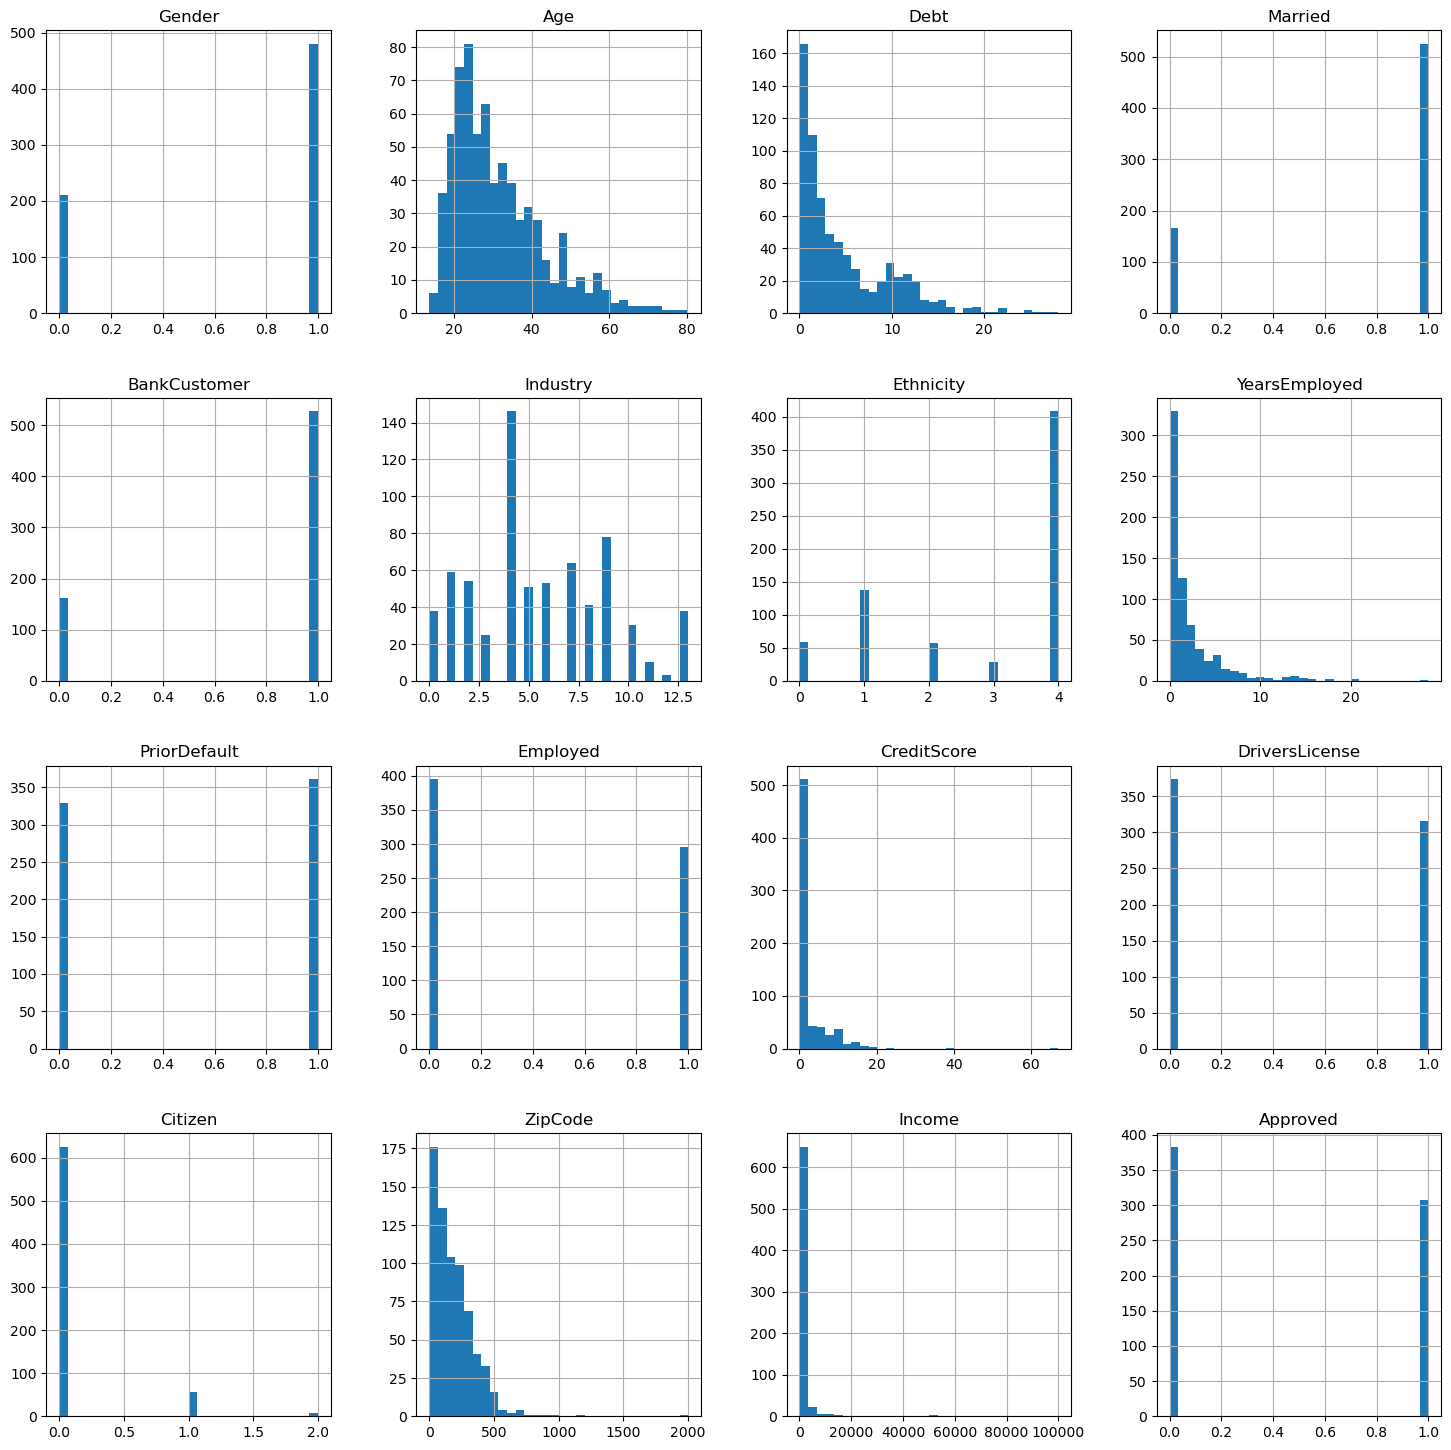

In [69]:
# PLOTTING HISTOGRAMS FOR ALL VARIABLES
fig = plt.figure(figsize=(18,18))
ax = fig.gca()
data.hist(ax=ax, bins = 30)
plt.show()

In [70]:
# CREATING A COPY TO RETAIN THE NUMERICAL INFORMATION OF THE DATA AS WE CHANGE THE 0 AND 1 TO
# 'DID NOT RESPOND' AND 'RESPONDED'
data1 = data.copy()

In [71]:
# RENAMING THE 0 AND 1 TO 'NOT APPROVED' AND 'APPROVED' RESPECTIVELY
data1.loc[:, 'Approved'] = data.loc[:, 'Approved'].apply(lambda x: 'admitted' if x == 1 else 'not approved')

In [72]:
data1.head(20)

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,7,4,1.250,1,1,1,0,0,202,0,admitted
1,0,58.67,4.460,1,1,9,1,3.040,1,1,6,0,0,43,560,admitted
2,0,24.50,0.500,1,1,9,1,1.500,1,0,0,0,0,280,824,admitted
3,1,27.83,1.540,1,1,7,4,3.750,1,1,5,1,0,100,3,admitted
4,1,20.17,5.625,1,1,7,4,1.710,1,0,0,0,1,120,0,admitted
5,1,32.08,4.000,1,1,0,4,2.500,1,0,0,1,0,360,0,admitted
6,1,33.17,1.040,1,1,12,1,6.500,1,0,0,1,0,164,31285,admitted
7,0,22.92,11.585,1,1,8,4,0.040,1,0,0,0,0,80,1349,admitted
8,1,54.42,0.500,0,0,5,1,3.960,1,0,0,0,0,180,314,admitted
9,1,42.50,4.915,0,0,7,4,3.165,1,0,0,1,0,52,1442,admitted


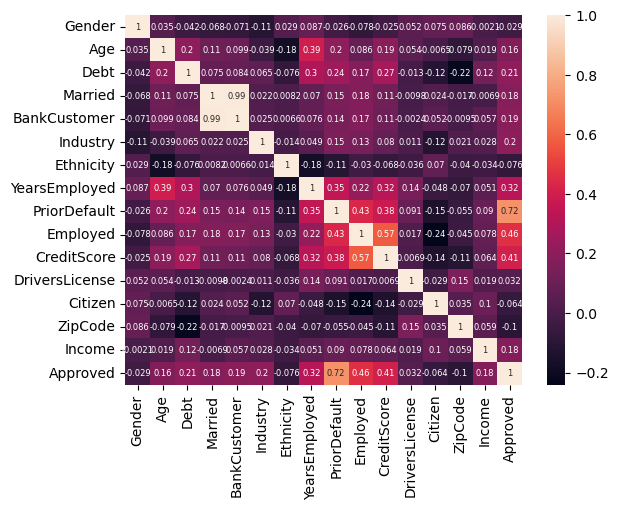

In [73]:
# # calculate the correlation matrix
corr = data.corr()

# plot the heatmap
sns.heatmap(corr , annot = True , annot_kws={"size": 6})
plt.show()

## 5. Model Building

In [74]:
from sklearn.model_selection import train_test_split

#drop variables not needed

columns_to_drop = ['DriversLicense','ZipCode']

data = data.drop(columns=columns_to_drop)

data.head(10)

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,Citizen,Income,Approved
0,1,30.83,0.000,1,1,7,4,1.250,1,1,1,0,0,1
1,0,58.67,4.460,1,1,9,1,3.040,1,1,6,0,560,1
2,0,24.50,0.500,1,1,9,1,1.500,1,0,0,0,824,1
3,1,27.83,1.540,1,1,7,4,3.750,1,1,5,0,3,1
4,1,20.17,5.625,1,1,7,4,1.710,1,0,0,1,0,1
5,1,32.08,4.000,1,1,0,4,2.500,1,0,0,0,0,1
6,1,33.17,1.040,1,1,12,1,6.500,1,0,0,0,31285,1
7,0,22.92,11.585,1,1,8,4,0.040,1,0,0,0,1349,1
8,1,54.42,0.500,0,0,5,1,3.960,1,0,0,0,314,1
9,1,42.50,4.915,0,0,7,4,3.165,1,0,0,0,1442,1


In [75]:
# Segregate features and labels into separate variables
X = data.iloc[:, 0:13]
y = data.iloc[:, 13] 

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=42)

In [76]:
from sklearn.preprocessing import MinMaxScaler
# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.fit_transform(X_test)

# you can try to do z-score normalization (look it up!)
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#rescaledX_train = scaler.fit_transform(X_train)
#rescaledX_test = scaler.fit_transform(X_test)

## Logistic Regression For The Given Dataset

In [77]:
from sklearn.linear_model import LogisticRegression
# Instantiate a LogisticRegression classifier with default parameter values
logreg = LogisticRegression(random_state=42)

# Fit model to the train set
logreg.fit(rescaledX_train, y_train)

LogisticRegression(random_state=42)

In [78]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, l1_ratio=None, max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
random_state=None, solver='warn', tol=0.0001, verbose=0,warm_start=False)

LogisticRegression(multi_class='warn', solver='warn')

In [79]:
from sklearn.metrics import confusion_matrix
y_pred = logreg.predict(rescaledX_test)

print("Accuracy of logistic regression classifier: ", logreg.score(rescaledX_test, y_test))

# Print the confusion matrix of the logreg model
confusion_matrix(y_test, y_pred)

Accuracy of logistic regression classifier:  0.8405797101449275


array([[87, 23],
       [10, 87]], dtype=int64)

## ROC Graph for the Logistic Regression Classification

C:\Users\my pc\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


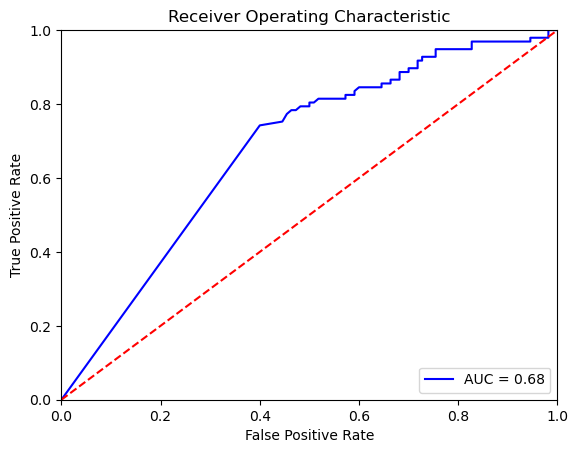

In [80]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = logreg.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Random Forest Classification for the Given Data Set

In [81]:
from sklearn.ensemble import RandomForestClassifier
# Instantiate a Random Forest classifier with default parameter values
RFC = RandomForestClassifier(random_state=84)

# Fit model to the train set
RFC.fit(rescaledX_train, y_train)

RandomForestClassifier(random_state=84)

In [82]:
RandomForestClassifier(class_weight=None,n_jobs=None,
random_state=None,verbose=0,warm_start=False)

RandomForestClassifier()

In [83]:
from sklearn.metrics import confusion_matrix
y_pred = RFC.predict(rescaledX_test)

print("Accuracy of Random Forest classifier: ", RFC.score(rescaledX_test, y_test))

# Print the confusion matrix of the logreg model
confusion_matrix(y_test, y_pred)

Accuracy of Random Forest classifier:  0.8743961352657005


array([[95, 15],
       [11, 86]], dtype=int64)

## ROC Graph for Random Forest Classification

C:\Users\my pc\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


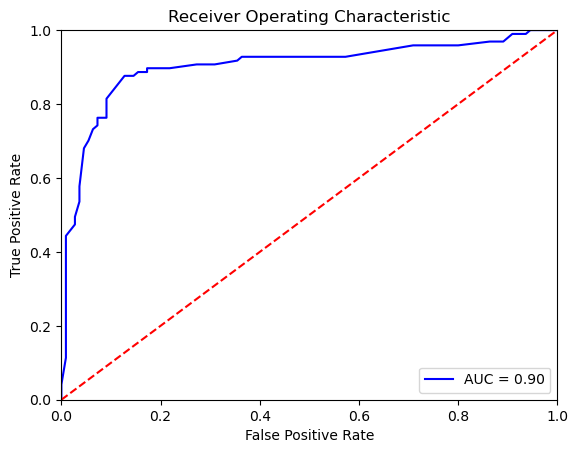

In [84]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = RFC.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()